Doing a train-test data split for the Dawson data.

In [ ]:
# data testing and training
from sklearn.neural_network import MLPClassifier #importing sklearn library for neural network model
import matplotlib.pyplot as plt # importing matplotlib for data visualization
import numpy as np #importing numpy for numerical operations
import pandas as pd #importing pandas for data manipulation
from sklearn.model_selection import train_test_split #importing train_test_split for splitting data into training and testing sets

from sklearn import datasets, linear_model #importing datasets and linear_model from sklearn
from sklearn.metrics import mean_squared_error, r2_score #importing metrics for model evaluation

In [2]:
#copy-pasting from InClass SciKitLearn Example
# columns I'm looking at from Dawson.csv: Lat, Lon, and Mammals
infile = 'Dawson_Cleaned.csv' #specifying the input file
######
jma_df = pd.read_csv(infile, sep = (',')) #reading the csv file into a pandas dataframe

#End the cell by visualizing the data variable, if that is what you called it, example:
jma_df.head() #displaying the first few rows of the dataframe

,TDWG_name,TDWG_code,TDWG_L2,TDWG_continent,Country,Plants,Ants,Amphibians,Reptiles,Fish,...,GDPpcRegion,bio_1_MEAN,bio_12_MEAN,LAT,LON,mean_110_plants,completeness_ants,mean_110_amphs,mean_110_mammals,mean_110_birds
0,Bahamas,81_BAH_OO,81,America_S,Bahamas,45.0,26.0,4.0,11.0,4.0,...,21940.70,251.767178,1040.366579,24.166683,-76.500439,3.154429,100.0,7.929974,21.967946,28.523720
1,Cuba,81_CUB_OO,81,America_S,Cuba,542.0,25.0,1.0,6.0,16.0,...,5702.00,250.427674,1328.684941,21.620126,-79.035225,9.459074,95.5,24.140767,13.005634,34.999270
2,Madagascar,29_MDG_OO,29,Africa,Madagascar,517.0,44.0,2.0,7.0,26.0,...,414.10,228.827301,1383.706731,-19.373527,46.705990,22.768005,96.7,9.982017,7.757508,23.979466
3,Philippines,42_PHI_OO,42,Asia_Trop,Philippines,628.0,21.0,4.0,3.0,42.0,...,3193.63,254.600180,2549.590033,11.747404,122.873632,4.695678,98.0,43.146365,30.696935,27.167378
4,Sri_Lanka,40_SRL_OO,40,Asia_Trop,Sri_Lanka,365.0,18.0,1.0,1.0,16.0,...,4065.56,265.170685,1877.459435,7.612357,80.704266,4.600191,100.0,9.121496,27.304177,53.030069


In [3]:
# import the Cleaned Dawson data file, then get columns I want for training
cleanedawsonfile = jma_df #assigning the dataframe to a new variable
dawsonfilefiltered = cleanedawsonfile[cleanedawsonfile.Mammals>0] #filtering the dataframe to include only rows where Mammals > 0
X = dawsonfilefiltered[["LAT", "LON"]] #features: Latitude and Longitude
y = dawsonfilefiltered[["Mammals"]] #target: Mammals
print(np.shape(X)) #printing the shape of the feature set
print(np.shape(y)) #printing the shape of the target set

# split data set to train/test 20/80 split
# 20/80 train/test split was selected because it provides a good balance between training the model and evaluating its performance on unseen data.
from sklearn.model_selection import train_test_split #importing train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #splitting the data into training and testing sets with 20% for testing

(7, 2)
(7, 1)


In [4]:
from sklearn.model_selection import cross_val_score #importing cross_val_score for cross-validation
from sklearn.linear_model import LinearRegression #importing LinearRegression model
from sklearn.neural_network import MLPRegressor #importing MLPRegressor for neural network regression

layers_saved = [] #initializing an empty list to save layer configurations
results = [] #initializing an empty list to store results
for nodes in range(7,15,1): #looping through different numbers of nodes
    for layers in range(7,15,1): #looping through different numbers of layers
        layers_saved.append(nodes) #adding the current number of nodes to the layers_saved list

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=5000, random_state=4) #creating an MLPRegressor model with specified hidden layer sizes
        mlp.fit(X_train,y_train) #fitting the model to the training data
        trainres = mlp.score(X_train,y_train) #calculating the training score
        predictions = mlp.predict(X_test) #making predictions on the test data
        accresults = mlp.score(X_test,y_test) #calculating the accuracy score
        res = [nodes,layers,trainres,accresults] #storing the results in a list
        results.append(res) #adding the results to the results list
    layers_saved = [] #resetting the layers_saved list for the next iteration
    print(results) #printing the results after each outer loop iteration

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataCon

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794]]


c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataCon

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566]]


c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataCon

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataCon

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.9019815049075878, -23.069539548876286], [7, 8, 0.99987764995028, -48.01076629414885], [7, 9, 0.9999707793778706, -47.297035987888734], [7, 10, 0.9999846865581339, -43.96040732739306], [7, 11, 0.4324955512207822, -27.490715002033674], [7, 12, 0.9932145691448315, -42.596014826542095], [7, 13, 0.5000214254172554, -34.07218454049161], [7, 14, 0.9997021085219298, -28.261775859915794], [8, 7, 0.5895781043477862, -31.702154894925613], [8, 8, 0.9998601657355193, -54.72711540543777], [8, 9, 0.9999313276624616, -18.136709671535087], [8, 10, 0.44907511734106476, -31.940316999014676], [8, 11, 0.461733233653, -9.203512153921835], [8, 12, 0.42750087448393237, -29.75379197634737], [8, 13, 0.42084969467808786, -20.206714128670413], [8, 14, 0.9997507251828264, -8.413890793549566], [9, 7, 0.9552128046116845, -37.48627814753821], [9, 8, 0.4767311974394042, -52.25381434884756], [9, 9, 0.9998647336698407, -40.002773744882894], [9, 10, 0.9999276559510619, -45.21226038942273], [9, 11, 0.99996466755

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


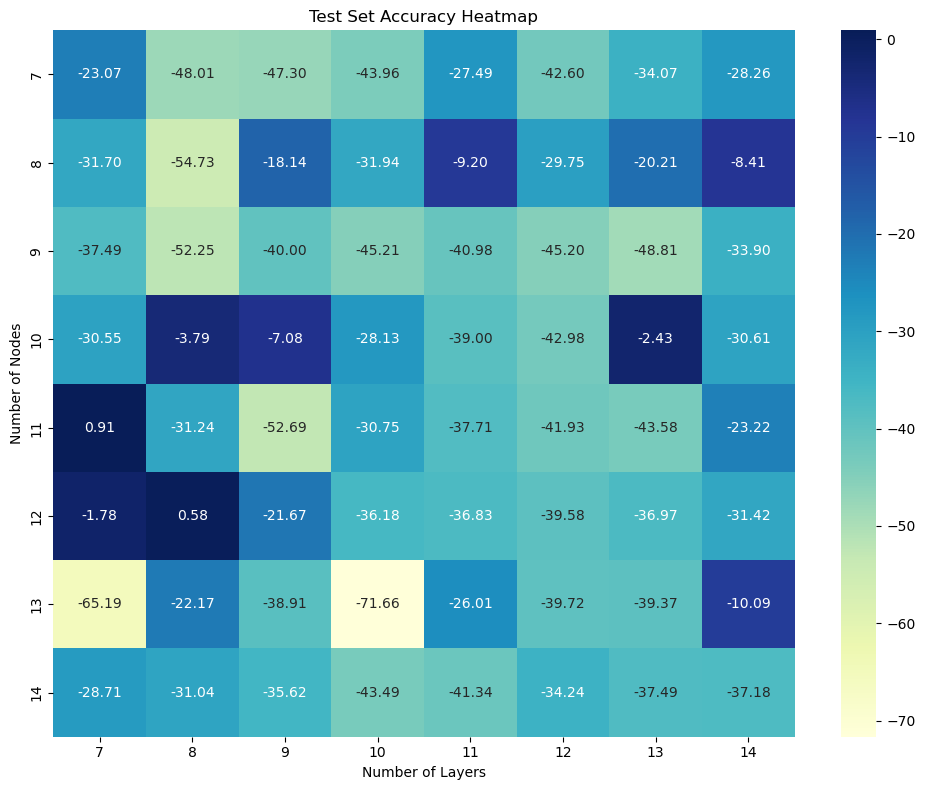

In [5]:
# make a seaborn heat map of results
import seaborn as sns #importing seaborn for data visualization
fig, ax = plt.subplots(figsize=(10,8)) #creating a figure and axis for the plot

# build a dataframe from results and pivot so shape matches actual grid
# results entries are [nodes, layers, train_score, test_score]
res_df = pd.DataFrame(results, columns=['nodes','layers','train','test']) #creating a dataframe from the results list

# ensure nodes and layers are sorted for consistent layout
nodes_vals = np.sort(res_df['nodes'].unique()) #getting sorted unique values of nodes
layers_vals = np.sort(res_df['layers'].unique()) #getting sorted unique values of layers

# pivot to a matrix of test scores (rows=nodes, cols=layers)
heatmap_df = res_df.pivot(index='nodes', columns='layers', values='test') #pivoting the dataframe to create a heatmap format

# plot
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", #	plotting the heatmap with annotations
			xticklabels=layers_vals, yticklabels=nodes_vals, ax=ax) #setting tick labels and axis labels
plt.xlabel('Number of Layers') #setting x-axis label
plt.ylabel('Number of Nodes') #setting y-axis label
plt.title('Test Set Accuracy Heatmap') #setting title
plt.tight_layout() #adjusting layout for better fit
plt.show() #displaying the plot

Data analysis:

Goals for 11/17

Now you should take a step back and think about your project. 

1) What was the original paper about?
    In the original paper, Arranz et. al sought to examine the effects of various environmental and human population factors on alien species richness in eight taxonomic groups at a global scale. Arranz et. al used Dawson et. al's (2017) data to create multiple types of models. Arranz et. al compared random forests and hierarchical partitioning with linear mixed effect models to unravel the individual and shared variation of environmental, economic, and human population factors with success or alien species richness in eight taxonomic groups on a global scale.

2) Did it model anything, or are you just using their data?
    Arranz. et al created several models, including univariate correlations, multiple regression, hierarchical partitioning, and two random forests. I am using the data that the authors used to create a random forest model of my own examining the relationship between environmental factors on one taxonomic group. 

3) What is your question, or idea?
    What is the relationship between latitude, longitude, and mammal alien species richness? What is the variable importance between latitude, longitude, and mammal alien species richness?

4) What are you specifically trying to model?
    I am going to model the relationship between latitude, longitude, and mammal alien species richness.

5) Why? How will it answer your question/idea?
    In the Arranz. et al article, the authors used random forests for classification tasks to determine the variable importance of multiple different factors on alien species richness in different taxonomic groups. For my model, I will be narrowing in on the effects of latitude and longitude on mammal alien species richness. Since I will not be looking at variable importance and I will be focusing on a count variable of mammal species rather than presence/absence, I will use a random forest model for regression.

6) What is your input data type, or structure?
    My input data type includes the latitude and longitude values.

7) What is your output data type?
    My output data type is mammal alien species richness counts.

8) What type of model have you decided to use to model your data?
    I will use a random forest model for a regression task to model the data.

9) Practical:
Have your data loaded
Plot initial data visualization
Explain your data type and input/output plans for your model
Create a train/test data split
Explain your model
Run a test using default or standard model parameters
Later this week and over the next 2 weeks we will discuss fine tuning model parameters to generate the most accurate model

10) Now that you've run the test, what are your results and what do they mean?
    The heatmap shows the accuracy of the test set when ran through different layers and nodes. The darker-shaded boxes indicate higher accuracy, while the lighter-shaded boxes indicate lower accuracy. Overall, the data is shown to be fairly accurate, with the highest accuracy found at 12 nodes and 8 layers.
